#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 

print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

print(y_label_train_OneHot.shape)
print(y_label_test_OneHot.shape)

(50000, 10)
(10000, 10)


# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [9]:
model = Sequential()

In [ ]:
#卷積層1

In [15]:
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [16]:
model.add(Dropout(rate=0.25))

In [12]:
#池化層1:

In [17]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#卷積層2與池化層2

In [18]:
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3), 
                 activation='relu',
                 padding='same'))

In [19]:
model.add(Dropout(0.25))

In [20]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [21]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [ ]:
#建立全網路連接層

In [23]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [24]:
model.add(Dense(10, activation='softmax'))

In [25]:
#檢查model 的STACK
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          18464     
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0

# 載入之前訓練的模型

In [26]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [28]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy'])


#作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accuracy and loss rate


In [29]:
train_history = model.fit(x_img_train_normalize,y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=12,
                          batch_size=128,
                          verbose=1)

Epoch 1/12
293/293 [==============================] - 57s 193ms/step - loss: 0.0900 - accuracy: 0.0992 - val_loss: 0.0900 - val_accuracy: 0.1156
Epoch 2/12
293/293 [==============================] - 56s 192ms/step - loss: 0.0900 - accuracy: 0.0983 - val_loss: 0.0900 - val_accuracy: 0.1142
Epoch 3/12
293/293 [==============================] - 56s 192ms/step - loss: 0.0900 - accuracy: 0.0993 - val_loss: 0.0900 - val_accuracy: 0.1168
Epoch 4/12
293/293 [==============================] - 56s 192ms/step - loss: 0.0900 - accuracy: 0.0982 - val_loss: 0.0900 - val_accuracy: 0.1168
Epoch 5/12
293/293 [==============================] - 57s 193ms/step - loss: 0.0900 - accuracy: 0.0996 - val_loss: 0.0900 - val_accuracy: 0.1158
Epoch 6/12
293/293 [==============================] - 56s 191ms/step - loss: 0.0900 - accuracy: 0.1010 - val_loss: 0.0900 - val_accuracy: 0.1146
Epoch 7/12
293/293 [==============================] - 56s 192ms/step - loss: 0.0900 - accuracy: 0.1011 - val_loss: 0.0900 - val_ac

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history_acc(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

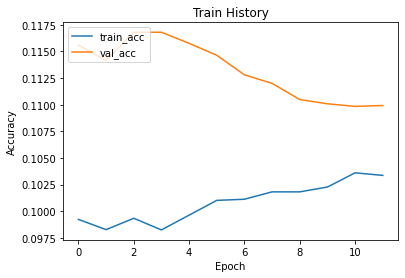

In [48]:
show_train_history_acc('accuracy','val_accuracy')

In [49]:
#定義一個繪圖函數
def show_train_history_loss(loss,val_loss):
    plt.plot(train_history.history[loss])
    plt.plot(train_history.history[val_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

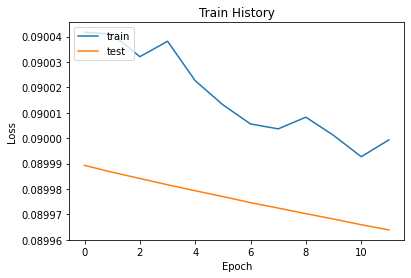

In [50]:
show_train_history_loss('loss','val_loss')

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [36]:
train_history2 = model.fit(x_img_train_normalize,y_label_train_OneHot,
                          validation_split=0.25,
                          epochs=12,
                          batch_size=128,
                          verbose=1)

Epoch 1/12
293/293 [==============================] - 57s 195ms/step - loss: 0.3251 - accuracy: 0.1026 - val_loss: 0.3248 - val_accuracy: 0.1135
Epoch 2/12
293/293 [==============================] - 56s 193ms/step - loss: 0.3249 - accuracy: 0.1058 - val_loss: 0.3248 - val_accuracy: 0.1249
Epoch 3/12
293/293 [==============================] - 56s 193ms/step - loss: 0.3248 - accuracy: 0.1069 - val_loss: 0.3247 - val_accuracy: 0.1377
Epoch 4/12
293/293 [==============================] - 57s 193ms/step - loss: 0.3247 - accuracy: 0.1098 - val_loss: 0.3246 - val_accuracy: 0.1480
Epoch 5/12
293/293 [==============================] - 57s 193ms/step - loss: 0.3246 - accuracy: 0.1115 - val_loss: 0.3246 - val_accuracy: 0.1551
Epoch 6/12
293/293 [==============================] - 57s 193ms/step - loss: 0.3246 - accuracy: 0.1129 - val_loss: 0.3245 - val_accuracy: 0.1620
Epoch 7/12
293/293 [==============================] - 57s 193ms/step - loss: 0.3245 - accuracy: 0.1146 - val_loss: 0.3244 - val_ac

In [51]:
#定義一個繪圖函數
def show_train_history_acc2(train_acc,test_acc):
    plt.plot(train_history2.history[train_acc])
    plt.plot(train_history2.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

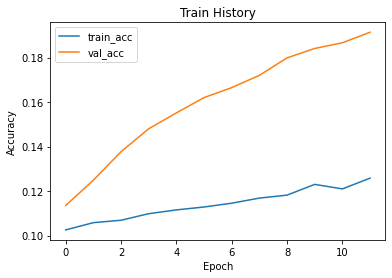

In [52]:
show_train_history_acc2('accuracy','val_accuracy')

In [53]:
#定義一個繪圖函數
def show_train_history_loss2(loss,val_loss):
    plt.plot(train_history2.history[loss])
    plt.plot(train_history2.history[val_loss])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

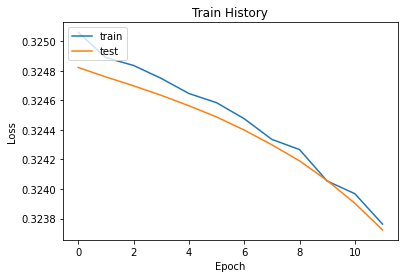

In [54]:
show_train_history_loss2('loss','val_loss')